In [4]:
%matplotlib widget
import pylab as pl
import numpy as np

In [5]:
import pyspeckit

In [6]:
source_size =  4.3350376922e+00
tkin = 7.9842254347e+01
Ntot = 1.0061155735e+16
vwidth_fwhm = 4.2101396644e+00
vwidth = vwidth_fwhm / np.sqrt(8*np.log(2))
vcen = -7.9000000000e+00
tbg = 0

In [7]:
# define path and name of molfit file
#DEFAULT MolfitsFileName = LocalPath + "files/my_molecules.molfit"
LocalPath = os.getcwd() + "/"

MolfitsFileName = LocalPath + 'CH3CN_pure.molfit'

def set_xclass_parameters(source_size=source_size, tkin=tkin, Ntot=Ntot, vwidth_fwhm=vwidth_fwhm, vcen=vcen, filename=MolfitsFileName):
    with open(filename, "w") as fh:
        fh.write(f"""
%============================================================================================================================
%
% define molecules and their components:
%
%============================================================================================================================
%    source size:                 T_kin:               N_tot:            V_width:                V_off:   CFFlag:    keyword:
%       [arcsec]:                   [K]:              [cm-2]:            [km /s]:              [km /s]:       []:         []:
CH3CN;v=0;           1
 {source_size}       {tkin}     {Ntot}     {vwidth_fwhm}    {vcen}         c
""")

In [35]:
import sys
import os


# get path of XCLASS directory
XCLASSRootDir = str(os.environ.get('XCLASSRootDir', '')).strip()
XCLASSRootDir = os.path.normpath(XCLASSRootDir) + "/"

# extend sys.path variable
NewPath = XCLASSRootDir + "build_tasks/"
if (not NewPath in sys.path):
    sys.path.append(NewPath)

import task_myXCLASS

# define min. freq. (in MHz)
FreqMin = 150000.0

# define max. freq. (in MHz)
FreqMax = 220800.0

# define freq. step (in MHz)
FreqStep = 1

# depending on parameter "Inter_Flag" define beam size (in arcsec)
# (Inter_Flag = True) or size of telescope (in m) (Inter_Flag = False)
TelescopeSize = 1000.0 # meters

# define beam minor axis length (in arsec)
BMIN = None

# define beam major axis length (in arsec)
BMAJ = None

# define beam position angle (in degree)
BPA = None

# interferrometric data?
Inter_Flag = False

# define red shift
Redshift = None

# BACKGROUND: describe continuum with tBack and tslope only
t_back_flag = True

# BACKGROUND: define background temperature (in K)
tBack = 0.0

# BACKGROUND: define temperature slope (dimensionless)
tslope = 0.0

# BACKGROUND: define path and name of ASCII file describing continuum as function
#             of frequency
BackgroundFileName = ""

# DUST: define hydrogen column density (in cm^(-2))
N_H = 1.e22

# DUST: define spectral index for dust (dimensionless)
beta_dust = 0.0

# DUST: define kappa at 1.3 mm (cm^(2) g^(-1))
kappa_1300 = 0.0

# DUST: define path and name of ASCII file describing dust opacity as
#       function of frequency
DustFileName = ""

# FREE-FREE: define electronic temperature (in K)
Te_ff = None

# FREE-FREE: define emission measure (in pc cm^(-6))
EM_ff = None

# SYNCHROTRON: define kappa of energy spectrum of electrons (electrons m^(−3) GeV^(-1))
kappa_sync = None

# SYNCHROTRON: define magnetic field (in Gauss)
B_sync = None

# SYNCHROTRON: energy spectral index (dimensionless)
p_sync = None

# SYNCHROTRON: thickness of slab (in AU)
l_sync = None

# PHEN-CONT: define phenomenological function which is used to describe
#            the continuum
ContPhenFuncID = None

# PHEN-CONT: define first parameter for phenomenological function
ContPhenFuncParam1 = None

# PHEN-CONT: define second parameter for phenomenological function
ContPhenFuncParam2 = None

# PHEN-CONT: define third parameter for phenomenological function
ContPhenFuncParam3 = None

# PHEN-CONT: define fourth parameter for phenomenological function
ContPhenFuncParam4 = None

# PHEN-CONT: define fifth parameter for phenomenological function
ContPhenFuncParam5 = None

# use iso ratio file?
iso_flag = True

# define path and name of iso ratio file
#DEFAULT IsoTableFileName = LocalPath + "files/my_isonames.txt"
IsoTableFileName = LocalPath + "my_isonames.txt"

# define path and name of file describing Non-LTE parameters
CollisionFileName = ""

# define number of pixels in x-direction (used for sub-beam description)
NumModelPixelXX = 100

# define number of pixels in y-direction (used for sub-beam description)
NumModelPixelYY = 100

# take local-overlap into account or not
LocalOverlapFlag = False

# disable sub-beam description
NoSubBeamFlag = True

# define path and name of database file
dbFilename = ""

# define rest freq. (in MHz)
RestFreq = 0.0

# define v_lsr (in km/s)
vLSR = 0.0

In [36]:
import io
from contextlib import redirect_stdout

def myxclass_call(FreqMin=1e3, FreqMax=1e4, verbose=False):
    ## call myXCLASS function
    with io.StringIO() as buf, redirect_stdout(buf):
        modeldata, log, TransEnergies, IntOpt, JobDir = task_myXCLASS.myXCLASS(
                                                    FreqMin, FreqMax, FreqStep,
                                                    TelescopeSize, BMIN, BMAJ,
                                                    BPA, Inter_Flag, Redshift,
                                                    t_back_flag, tBack, tslope,
                                                    BackgroundFileName,
                                                    N_H, beta_dust, kappa_1300,
                                                    DustFileName, Te_ff, EM_ff,
                                                    kappa_sync, B_sync, p_sync,
                                                    l_sync, ContPhenFuncID,
                                                    ContPhenFuncParam1,
                                                    ContPhenFuncParam2,
                                                    ContPhenFuncParam3,
                                                    ContPhenFuncParam4,
                                                    ContPhenFuncParam5,
                                                    MolfitsFileName, iso_flag,
                                                    IsoTableFileName,
                                                    CollisionFileName,
                                                    NumModelPixelXX,
                                                    NumModelPixelYY,
                                                    LocalOverlapFlag,
                                                    NoSubBeamFlag,
                                                    dbFilename,
                                                    RestFreq, vLSR)
        output = buf.getvalue()
    if verbose:
        print(output)
        
    return modeldata, log, TransEnergies, IntOpt, JobDir

In [37]:
set_xclass_parameters()
modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)

 
Reading command line parameters .. done!
 
Command line arguments:
  First frequency:                  1.5000000000E+05
  Last frequency:                   2.2080000000E+05
  Stepsize (resolution):            1.0000000000E+00
  Size of telescope:                1.0000000000E+03
  Interferrometer flag:             F
  v_LSR:                            0.0000000000E+00
  Background temperature flag:      T
  Background Temperature:           0.0000000000E+00
  Temperature Slope:                0.0000000000E+00
  N_H:                              1.0000000000E+22
  beta dust:                        0.0000000000E+00
  kappa:                            0.0000000000E+00
  NumModelPixelXX:                  100
  NumModelPixelYY:                  100
  Local-overlap flag:               F
  No sub-beam flag:                 T
  Path and name of instance file:   "parameter.xml"
  Iso flag:                         T
  Path and name of database file:   "/orange/adamginsburg/software/XCLASS-Inter

In [38]:
from astropy import units as u, constants

In [39]:
xaxis, yaxis = modeldata.T
xclass_spectrum = pyspeckit.Spectrum(xarr=xaxis*u.MHz, data=yaxis*u.K)

In [40]:
pl.close('all')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
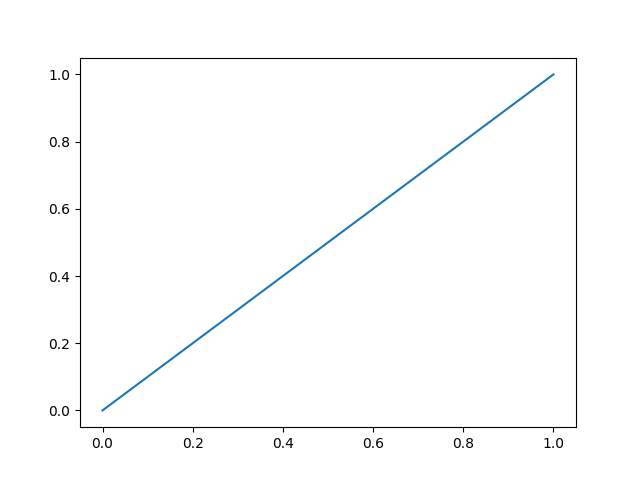

In [41]:
pl.figure(1)
pl.plot([0,1])

In [44]:
line_list.append(pl.gca().get_xlim())

(183221.46136011227, 184543.86280460842)

In [42]:
fig=pl.figure(1)
ax=pl.gca()
xclass_spectrum.plotter(axis=ax, clear=True)

In [11]:
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, get_molecular_parameters, generate_model, generate_fitter

In [12]:
ch3_13cn_to_ch3cn = 1./16.

In [13]:
Cfreqs, Caij, Cdeg, CEU, Cpartfunc = get_molecular_parameters('CH3CN, v=0',
                                                         catalog='CDMS',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_12c_CDMS(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=Cfreqs, aij=Caij, deg=Cdeg, EU=CEU, partfunc=Cpartfunc)
    return model

In [14]:
freqs, aij, deg, EU, partfunc = get_molecular_parameters('CH3CN',
                                                         catalog='JPL',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
freqs13, aij13, deg13, EU13, partfunc13 = lte_molecule.get_molecular_parameters('CH3C-13-N',
                                                                                catalog='JPL',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_12c(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column, freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
    return model

def modfunc_13c(xarr, vcen, width, tex, column, **kwargs):
    model = generate_model(xarr, vcen, width, tex, 
                   column=column*ch3_13cn_to_ch3cn, freqs=freqs13, aij=aij13, deg=deg13, EU=EU13, partfunc=partfunc13)
    return model


def modfunc(xarr, vcen, width, tex, column, **kwargs):
    join = np.concatenate
    model = generate_model(xarr, vcen, width, tex, 
                   column=join([np.ones_like(deg)*column, np.ones_like(deg13)*column*ch3_13cn_to_ch3cn]),
                   freqs=join([freqs, freqs13]),
                   aij=join([aij, aij13]),
                   deg=join([deg, deg13]),
                   EU=join([EU, EU13]),
                   partfunc=join([np.ones_like(deg)*partfunc(tex), np.ones_like(deg13)*partfunc13(tex)])
                  )
    return model
    
fitter = generate_fitter(modfunc, name="CH3CN")

In [15]:
model12cdms = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_12c_CDMS(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))

model12 = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_12c(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))
model13 = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_13c(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))
model = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot, ))

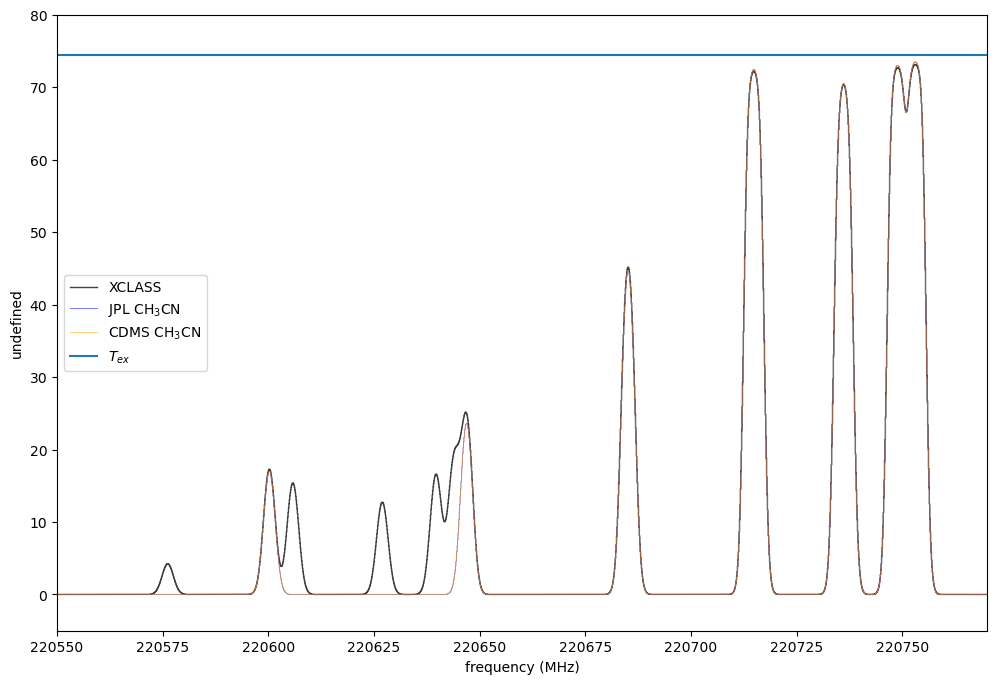

In [16]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(alpha=0.75, figure=fig, label='XCLASS', linewidth=1, zorder=-5)
ax = xclass_spectrum.plotter.axis
#model.plotter(clear=False, color='r', axis=ax, alpha=0.75, label='JPL')
model12.plotter(clear=False, color='b', axis=ax, alpha=0.75, label='JPL CH$_3$CN')
#model13.plotter(clear=False, color='g', axis=ax, alpha=0.75, label='JPL CH$_3$$^{13}$CN')
model12cdms.plotter(clear=False, color='orange', axis=ax, alpha=0.75, label='CDMS CH$_3$CN')

ax.axhline(lte_molecule.Jnu_cgs(220.65e9, tkin) - lte_molecule.Jnu_cgs(220.65e9, 2.73), label='$T_{ex}$')
ax.set_xlim(220550, 220770)
ax.set_ylim(-5, 80)
pl.legend(loc='best')

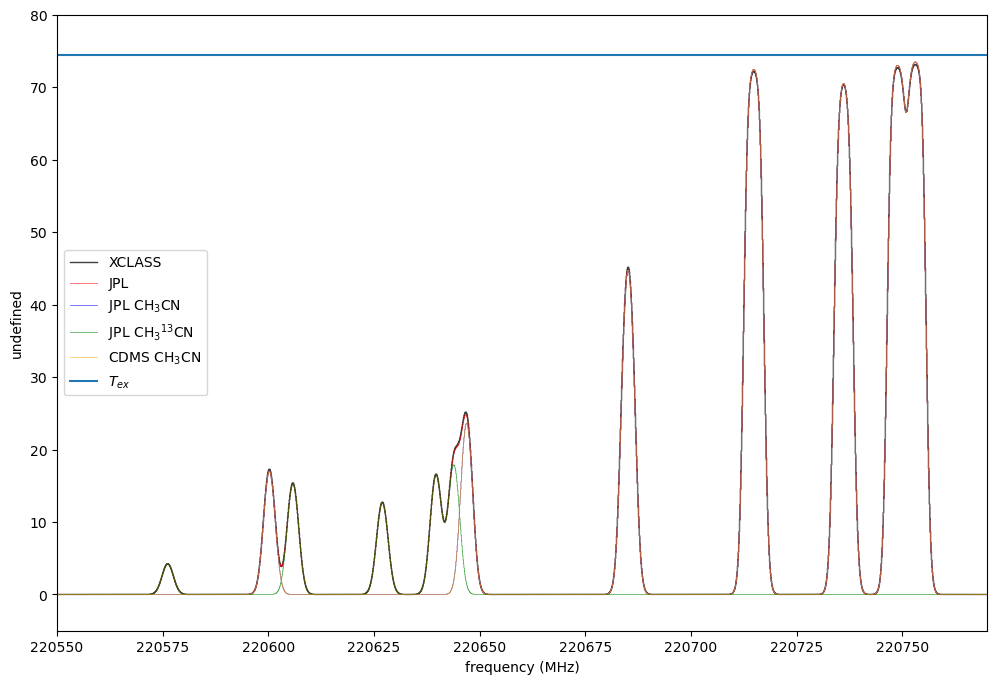

In [17]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(alpha=0.75, figure=fig, label='XCLASS', linewidth=1, zorder=-5)
ax = xclass_spectrum.plotter.axis
model.plotter(clear=False, color='r', axis=ax, alpha=0.75, label='JPL')
model12.plotter(clear=False, color='b', axis=ax, alpha=0.75, label='JPL CH$_3$CN')
model13.plotter(clear=False, color='g', axis=ax, alpha=0.75, label='JPL CH$_3$$^{13}$CN')
model12cdms.plotter(clear=False, color='orange', axis=ax, alpha=0.75, label='CDMS CH$_3$CN')

ax.axhline(lte_molecule.Jnu_cgs(220.65e9, tkin) - lte_molecule.Jnu_cgs(220.65e9, 2.73), label='$T_{ex}$')
ax.set_xlim(220550, 220770)
ax.set_ylim(-5, 80)
pl.legend(loc='best')

In [18]:
temperatures = [10, 50, 100, 300]
columns = [1e14, 1e15, 1e16, 1e17]

temcol_results = {}
for tem in temperatures:
    temcol_results[tem] = {}
    for col in columns:
        print(col, tem)
        set_xclass_parameters(tkin=tem, Ntot=col)
        modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)
        JM_ = modfunc(modeldata.T[0]*u.MHz, vcen, width=vwidth, tex=tem, column=col)
        model_JPL_ = pyspeckit.Spectrum(xarr=modeldata.T[0]*u.MHz, data=JM_*u.K, header={})
        temcol_results[tem][col] = {'xclass':
                               {'modeldata':modeldata, 'log':log, 'TransEnergies':TransEnergies, 'IntOpt':IntOpt, 'JobDir':JobDir, 
                                'sp': pyspeckit.Spectrum(data=modeldata.T[1]*u.K, xarr=modeldata.T[0]*u.MHz, header={})},
                               'jpl': model_JPL_}

100000000000000.0 10
1000000000000000.0 10
1e+16 10
1e+17 10
100000000000000.0 50
1000000000000000.0 50
1e+16 50
1e+17 50
100000000000000.0 100
1000000000000000.0 100
1e+16 100
1e+17 100
100000000000000.0 300
1000000000000000.0 300
1e+16 300
1e+17 300


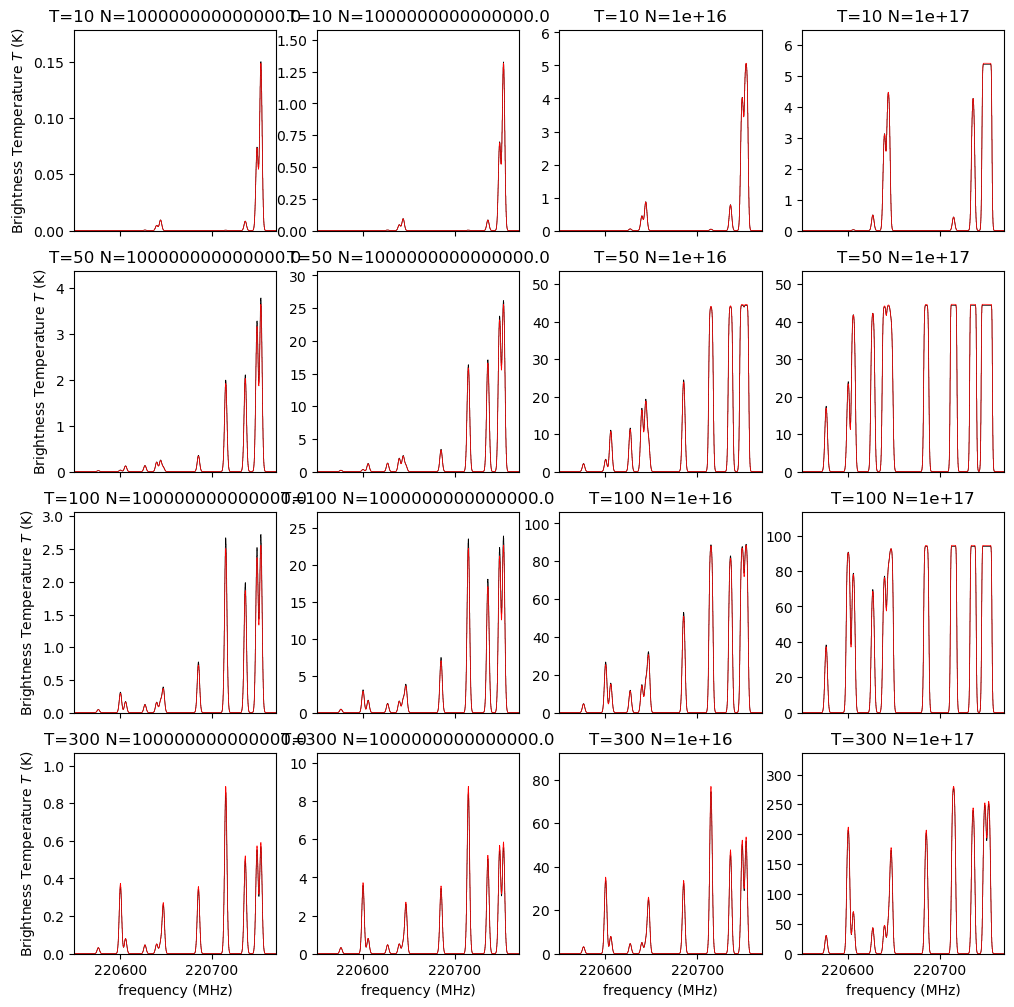

In [19]:
pl.figure(figsize=(12,12))
ii = 1
for tem in temperatures:
    for col in columns:
        ax = pl.subplot(4,4,ii)
        #temcol_results[tem][col]['xclass']['sp'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        #temcol_results[tem][col]['jpl'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        temcol_results[tem][col]['xclass']['sp'].plotter(axis=ax)
        temcol_results[tem][col]['jpl'].plotter(axis=ax, clear=False, color='r')
        ax.set_title(f"T={tem} N={col}")
        if ii <= 12:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        #else:
        #    ax.set_xlabel("$V_{LSR}$ [km s$^{-1}$]")
        if ii % 4 == 1:
            ylim = ax.get_ylim()
        if ii % 4 != 1:
            ax.set_ylabel('')
        ii += 1
        ax.set_xlim(220550, 220770)


In [20]:
temperatures = [200,250,300,350]
columns = [1e14, 1e15, 1e16, 1e17]

temcol_results = {}
for tem in temperatures:
    temcol_results[tem] = {}
    for col in columns:
        print(col, tem)
        set_xclass_parameters(tkin=tem, Ntot=col)
        modeldata, log, TransEnergies, IntOpt, JobDir = myxclass_call(FreqMin=FreqMin, FreqMax=FreqMax)
        CM_ = modfunc_12c_CDMS(modeldata.T[0]*u.MHz, vcen, width=vwidth, tex=tem, column=col)
        model_CM_ = pyspeckit.Spectrum(xarr=modeldata.T[0]*u.MHz, data=CM_*u.K, header={})
        temcol_results[tem][col] = {'xclass':
                               {'modeldata':modeldata, 'log':log, 'TransEnergies':TransEnergies, 'IntOpt':IntOpt, 'JobDir':JobDir, 
                                'sp': pyspeckit.Spectrum(data=modeldata.T[1]*u.K, xarr=modeldata.T[0]*u.MHz, header={})},
                               'cdms': model_CM_}

100000000000000.0 200
1000000000000000.0 200
1e+16 200
1e+17 200
100000000000000.0 250
1000000000000000.0 250
1e+16 250
1e+17 250
100000000000000.0 300
1000000000000000.0 300
1e+16 300
1e+17 300
100000000000000.0 350
1000000000000000.0 350
1e+16 350
1e+17 350


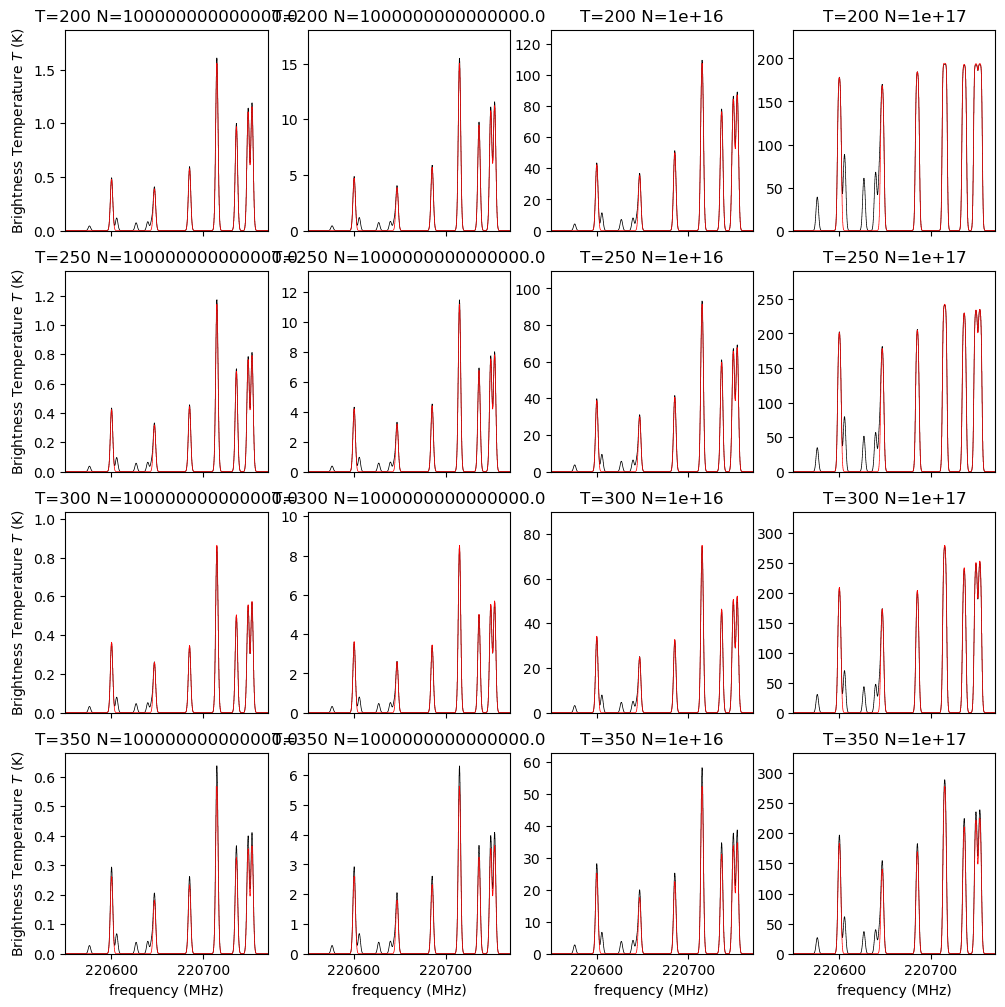

In [21]:
pl.figure(figsize=(12,12))
ii = 1
for tem in temperatures:
    for col in columns:
        ax = pl.subplot(4,4,ii)
        #temcol_results[tem][col]['xclass']['sp'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        #temcol_results[tem][col]['jpl'].xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=115271.2018*u.MHz)
        temcol_results[tem][col]['xclass']['sp'].plotter(axis=ax)
        temcol_results[tem][col]['cdms'].plotter(axis=ax, clear=False, color='r')
        ax.set_title(f"T={tem} N={col}")
        if ii <= 12:
            ax.set_xlabel('')
            ax.set_xticklabels([])
        #else:
        #    ax.set_xlabel("$V_{LSR}$ [km s$^{-1}$]")
        if ii % 4 == 1:
            ylim = ax.get_ylim()
        if ii % 4 != 1:
            ax.set_ylabel('')
        ii += 1
        ax.set_xlim(220550, 220770)


In [22]:
Cfreqs, Caij, Cdeg, CEU, Cpartfunc

(<Quantity [220235.0315, 220323.6311, 220403.9006, 220403.9006, 220475.8078,
            220539.324 , 220594.4237, 220594.4237, 220641.0844, 220679.2874,
            220709.017 , 220709.017 , 220730.2611, 220743.0111, 220747.2617] MHz>,
 array([-3.83371355, -3.55145404, -3.39505634, -3.39505634, -3.29097697,
        -3.2158766 , -3.15992049, -3.15992049, -3.11757824, -3.08562449,
        -3.06233779, -3.06233779, -3.04650213, -3.03720522, -3.03414042]),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]),
 array([1.28594569e-13, 1.07965518e-13, 8.92871424e-14, 8.92871424e-14,
        7.25635921e-14, 5.77986219e-14, 4.49955489e-14, 4.49955489e-14,
        3.41572731e-14, 2.52862179e-14, 1.83844293e-14, 1.83844293e-14,
        1.34534368e-14, 1.04944122e-14, 9.50799121e-15]),
 <function pyspeckit.spectrum.models.lte_molecule.get_molecular_parameters.<locals>.partfunc(tem)>)

In [23]:
len(Cdeg)

15

In [24]:
from astropy.table import Table

In [25]:
xclass_transitions = [{'freq': float(x[0]),
                       'intensity': float(x[2]),
                       'integrated_intensity': float(x[3]),
                       'elow': float(x[4]),
                       'gup': int(float(x[5])),
                       'aij': float(x[6]),
                       'Q': " ".join(x[7:-1]),
                       'name': x[-1]}
                      for x in TransEnergies[1:]]
xctb = Table(xclass_transitions)

In [26]:
blah = xctb[xctb['name'] == 'CH3CN;v=0;']
blah2 = blah[(blah['freq'] < 220.8e3) & (blah['freq'] > 220.2e3)]
blah2.sort('freq')
blah2

freq,intensity,integrated_intensity,elow,gup,aij,Q,name
float64,float64,float64,float64,int64,float64,str119,str14
220235.0315,5.488882307318049,0.0,920.831961777747,50,0.000146609,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220323.6311,15.85071646679067,0.0,771.4129221509779,50,0.000280826,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220403.9006,62.05330483979389,0.0,636.12286603155,50,0.00040258,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220403.9006,62.05330483979389,0.0,636.12286603155,50,0.00040258,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220475.8078,56.25054616324412,0.0,514.991938507551,50,0.000511619,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220539.324,86.02793818474505,0.0,408.047256058324,50,0.00060822,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220594.4237,197.1546059848721,-197.0266370225133,315.31285907509,50,0.000691876,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220594.4237,197.1546059848721,-197.0266370225133,315.31285907509,50,0.000691876,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;
220641.0844,154.6153594355904,-197.0266370225133,236.809667259109,50,0.000762747,ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0; ElecStateLabel = X; v4 = 0; v7 = 0; v8 = 0; l7 = 0; l8 = 0;,CH3CN;v=0;


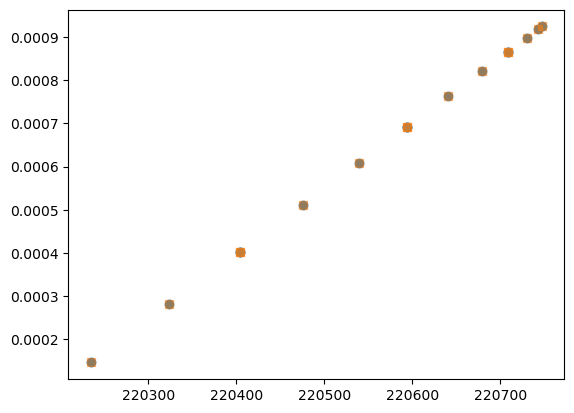

In [27]:
pl.plot(blah2['freq'], blah2['aij'], 'o')
pl.plot(Cfreqs, 10**Caij, 's', alpha=0.5)

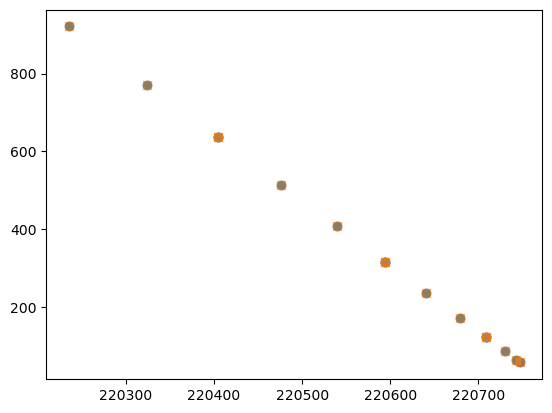

In [28]:
pl.plot(blah2['freq'], blah2['elow'], 'o')
pl.plot(Cfreqs, (CEU*u.erg/constants.k_B - Cfreqs*constants.h/constants.k_B).to(u.K), 's', alpha=0.5)

In [29]:
log

[' \n',
 'myXCLASS log-file for the calculation of the spectrum:\n',
 '------------------------------------------------------\n',
 ' \n',
 ' \n',
 'Calculation starts at Date: 09.09.2021,     Time: 11:06:41\n',
 ' \n',
 ' \n',
 'Command line arguments:\n',
 '  First frequency:                  2.2000000000E+05\n',
 '  Last frequency:                   2.2080000000E+05\n',
 '  Stepsize (resolution):            1.0000000000E-01\n',
 '  Size of telescope:                1.0000000000E+03\n',
 '  Interferrometer flag:             F\n',
 '  v_LSR:                            0.0000000000E+00\n',
 '  Background temperature flag:      T\n',
 '  Background Temperature:           0.0000000000E+00\n',
 '  Temperature Slope:                0.0000000000E+00\n',
 '  N_H:                              1.0000000000E+22\n',
 '  beta dust:                        0.0000000000E+00\n',
 '  kappa:                            0.0000000000E+00\n',
 '  NumModelPixelXX:                  100\n',
 '  NumModelPixelYY

In [30]:
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='CH3CN;v=0;'"
Contents = task_DatabaseQuery.DatabaseQuery(QueryString)
# The partition function values are stored in "Contents[0][5:5+110]"

 
 
Reading data from sqlite3 database .. done!
 
Screen output:
('CH3CN;v=0;', 'WEVYAHXRMPXWCK-UHFFFAOYSA-N', 'XCDMS-1487', '', '', 5.58739357548, 5.93060638648, 6.30319781008, 6.70601708199, 7.14478784689, 7.61630640361, 8.1269387597, 8.6835833447, 9.28882522968, 9.95055593634, 10.6773290776, 11.4731299215, 12.3475062078, 13.3050928853, 13.835510727, 14.3619140263, 15.5293040712, 16.8130990243, 18.2251279651, 19.7840168553, 21.5029664486, 23.3956159809, 25.4760748795, 27.766075179, 28.4924237684, 30.2814194696, 33.0460966473, 36.0933440881, 39.435372567, 43.1008421305, 47.1369963758, 51.5696449228, 56.4436856993, 61.8077538361, 64.0954792605, 67.7054617331, 74.2028484213, 81.3623653321, 89.2620763387, 97.9668455119, 107.600038332, 118.24280181, 130.027951532, 143.077446978, 157.559587255, 164.316804477, 173.62025899, 191.467790261, 211.28779785, 233.320162125, 257.823007595, 285.057868441, 315.34969547, 349.03073636, 386.455083073, 428.069292641, 449.081140363, 474.299368443, 525.636

In [31]:
Contents

[('CH3CN;v=0;',
  'WEVYAHXRMPXWCK-UHFFFAOYSA-N',
  'XCDMS-1487',
  '',
  '',
  5.58739357548,
  5.93060638648,
  6.30319781008,
  6.70601708199,
  7.14478784689,
  7.61630640361,
  8.1269387597,
  8.6835833447,
  9.28882522968,
  9.95055593634,
  10.6773290776,
  11.4731299215,
  12.3475062078,
  13.3050928853,
  13.835510727,
  14.3619140263,
  15.5293040712,
  16.8130990243,
  18.2251279651,
  19.7840168553,
  21.5029664486,
  23.3956159809,
  25.4760748795,
  27.766075179,
  28.4924237684,
  30.2814194696,
  33.0460966473,
  36.0933440881,
  39.435372567,
  43.1008421305,
  47.1369963758,
  51.5696449228,
  56.4436856993,
  61.8077538361,
  64.0954792605,
  67.7054617331,
  74.2028484213,
  81.3623653321,
  89.2620763387,
  97.9668455119,
  107.600038332,
  118.24280181,
  130.027951532,
  143.077446978,
  157.559587255,
  164.316804477,
  173.62025899,
  191.467790261,
  211.28779785,
  233.320162125,
  257.823007595,
  285.057868441,
  315.34969547,
  349.03073636,
  386.455083073

In [32]:
T = [1.072, 1.148, 1.23, 1.318, 1.413, 1.514, 1.622, 1.738, 1.862, 1.995, 2.138, 2.291, 2.455, 2.63, 2.725, 2.818, 3.02, 3.236, 3.467, 3.715, 3.981, 4.266, 4.571, 4.898, 5, 5.248, 5.623, 6.026, 6.457, 6.918, 7.413, 7.943, 8.511, 9.12, 9.375, 9.772, 10.471, 11.22, 12.023, 12.882, 13.804, 14.791, 15.849, 16.982, 18.197, 18.75, 19.498, 20.893, 22.387, 23.988, 25.704, 27.542, 29.512, 31.623, 33.884, 36.308, 37.5, 38.905, 41.687, 44.668, 47.863, 51.286, 54.954, 58.884, 63.096, 67.608, 72.444, 75, 77.625, 83.176, 89.125, 95.499, 102.329, 109.648, 117.49, 125.893, 134.896, 144.544, 150, 154.882, 165.959, 177.828, 190.546, 204.174, 218.776, 225, 234.423, 251.189, 269.153, 288.403, 300, 309.03, 331.131, 354.813, 380.189, 407.38, 436.516, 467.735, 500, 501.187, 537.032, 575.44, 616.595, 660.693, 707.946, 758.578, 812.831, 870.964, 933.254, 1000]

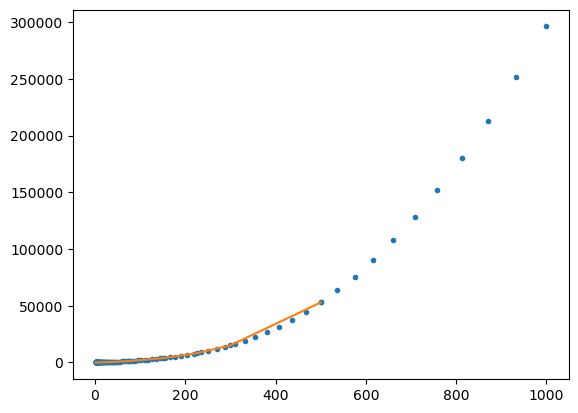

In [33]:
pl.plot(T, Contents[0][5:115], '.')
pl.plot(T, Cpartfunc(T))

In [34]:
!mv c041001.cat ch3cn.cat

mv: cannot stat ‘c041001.cat’: No such file or directory


In [35]:
from molsim.classes import Workspace, Catalog, Transition, Level, Molecule, PartitionFunction, Spectrum, Simulation, Continuum, Source, Observatory, Observation, Iplot, Trace
from molsim.file_handling import load_mol, load_obs, load_multi_obs
ch3cn = load_mol('ch3cn.cat', 
              type='SPCAT',
              qpart_file='ch3cn.qpart')
ch3cn_src = Source(column = Ntot, #column density in cm-2
                Tex = tkin, #excitation temperature in K
                dV = vwidth_fwhm, #FWHM linewidth in km/s
                velocity = vcen, #vlsr in km/s
                size = 1e20, #source size in arcseconds; default is 1E20 so no beam dilution is considered.
                continuum = Continuum(params=tbg), 
                #a continuum object to define the background temperature. Default 2.7 K.
                #This can be substantially more flexible if needed - see the Continuum class object.
                )
ch3cn_sim = Simulation(  observation = Observation(), #a default Observation object (see note below)
                      source = ch3cn_src, #the source of emission
                      ll = FreqMin, #lower limit
                      ul = FreqMax, #upper limit
                      res = FreqStep, #resolution in MHz
                      mol = ch3cn, #molecule
)
molsim_sp = pyspeckit.Spectrum(xarr=ch3cn_sim.spectrum.freq_profile*u.MHz, data=ch3cn_sim.spectrum.int_profile*u.K, header={})

divide by zero encountered in true_divide


Text(0, 0.5, '$Q_{rot}$')

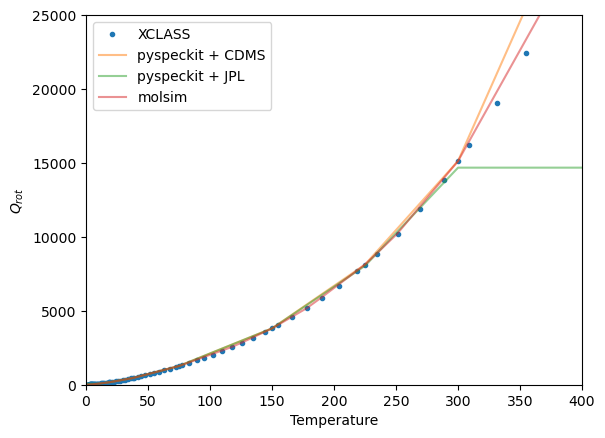

In [36]:
pl.plot(T, Contents[0][5:115], '.', label='XCLASS')
pl.plot(T, Cpartfunc(T), label='pyspeckit + CDMS', alpha=0.5)
pl.plot(T, partfunc(T), label='pyspeckit + JPL', alpha=0.5)
pl.plot(T, ch3cn.qpart.qrot(T), label='molsim', alpha=0.5)
pl.legend(loc='best')
pl.gca().axis([0,400,0,25000])
pl.xlabel("Temperature")
pl.ylabel("$Q_{rot}$")

In [37]:
from astroquery.jplspec import JPLSpec
st = JPLSpec.get_species_table()
st[st['NAME'] == 'CH3CN']

TAG,NAME,NLINE,QLOG1,QLOG2,QLOG3,QLOG4,QLOG5,QLOG6,QLOG7,VER
int64,str13,int64,float64,float64,float64,float64,float64,float64,float64,str2
41001,CH3CN,1728,4.1668,3.9055,3.5806,3.103,2.6523,2.2157,1.8068,4*


In [38]:
st.meta

{'Temperature (K)': [300, 225, 150, 75, 37.5, 18.5, 9.375]}

In [39]:
row = [st[st['NAME'] == 'CH3CN'][x] for x in ["QLOG1","QLOG2","QLOG3","QLOG4","QLOG5","QLOG6","QLOG7"]]
row

[<Column name='QLOG1' dtype='float64' length=1>
 4.1668,
 <Column name='QLOG2' dtype='float64' length=1>
 3.9055,
 <Column name='QLOG3' dtype='float64' length=1>
 3.5806,
 <Column name='QLOG4' dtype='float64' length=1>
 3.103,
 <Column name='QLOG5' dtype='float64' length=1>
 2.6523,
 <Column name='QLOG6' dtype='float64' length=1>
 2.2157,
 <Column name='QLOG7' dtype='float64' length=1>
 1.8068]

In [40]:
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='CH3CN;'"
Contents = task_DatabaseQuery.DatabaseQuery(QueryString)

 
 
Reading data from sqlite3 database .. done!
 
Screen output:


import task_UpdateDatabase
DBUpdateNew = "new"
task_UpdateDatabase.UpdateDatabase(DBUpdateNew)

 
 
Reading data from sqlite3 database .. done!
 
Screen output:
('CH3CN;v=0;', 'WEVYAHXRMPXWCK-UHFFFAOYSA-N', 'XCDMS-1487', '', '', 5.58739357548, 5.93060638648, 6.30319781008, 6.70601708199, 7.14478784689, 7.61630640361, 8.1269387597, 8.6835833447, 9.28882522968, 9.95055593634, 10.6773290776, 11.4731299215, 12.3475062078, 13.3050928853, 13.835510727, 14.3619140263, 15.5293040712, 16.8130990243, 18.2251279651, 19.7840168553, 21.5029664486, 23.3956159809, 25.4760748795, 27.766075179, 28.4924237684, 30.2814194696, 33.0460966473, 36.0933440881, 39.435372567, 43.1008421305, 47.1369963758, 51.5696449228, 56.4436856993, 61.8077538361, 64.0954792605, 67.7054617331, 74.2028484213, 81.3623653321, 89.2620763387, 97.9668455119, 107.600038332, 118.24280181, 130.027951532, 143.077446978, 157.559587255, 164.316804477, 173.62025899, 191.467790261, 211.28779785, 233.320162125, 257.823007595, 285.057868441, 315.34969547, 349.03073636, 386.455083073, 428.069292641, 449.081140363, 474.299368443, 525.636

Text(0, 0.5, '$Q_{rot}$')

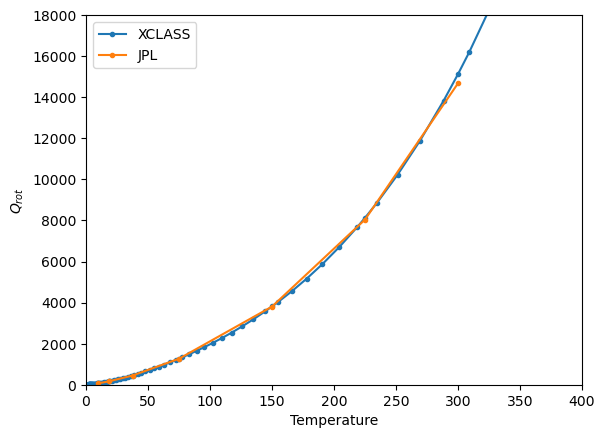

In [41]:
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='CH3CN;v=0;'"
Contents = task_DatabaseQuery.DatabaseQuery(QueryString)

T = [1.072, 1.148, 1.23, 1.318, 1.413, 1.514, 1.622, 1.738, 1.862, 1.995, 2.138, 2.291, 2.455, 2.63, 2.725, 2.818, 3.02, 3.236, 3.467, 3.715, 3.981, 4.266, 4.571, 4.898, 5, 5.248, 5.623, 6.026, 6.457, 6.918, 7.413, 7.943, 8.511, 9.12, 9.375, 9.772, 10.471, 11.22, 12.023, 12.882, 13.804, 14.791, 15.849, 16.982, 18.197, 18.75, 19.498, 20.893, 22.387, 23.988, 25.704, 27.542, 29.512, 31.623, 33.884, 36.308, 37.5, 38.905, 41.687, 44.668, 47.863, 51.286, 54.954, 58.884, 63.096, 67.608, 72.444, 75, 77.625, 83.176, 89.125, 95.499, 102.329, 109.648, 117.49, 125.893, 134.896, 144.544, 150, 154.882, 165.959, 177.828, 190.546, 204.174, 218.776, 225, 234.423, 251.189, 269.153, 288.403, 300, 309.03, 331.131, 354.813, 380.189, 407.38, 436.516, 467.735, 500, 501.187, 537.032, 575.44, 616.595, 660.693, 707.946, 758.578, 812.831, 870.964, 933.254, 1000]
pl.plot(T, Contents[0][5:115], '.-', label='XCLASS')
pl.plot(st.meta['Temperature (K)'], [10**st[st['NAME'] == 'CH3CN'][x] for x in ["QLOG1","QLOG2","QLOG3","QLOG4","QLOG5","QLOG6","QLOG7"]], '.-', label='JPL')
pl.legend(loc='best')
pl.gca().axis([0,400,0,18000])
pl.xlabel("Temperature")
pl.ylabel("$Q_{rot}$")

In [42]:
from astroquery.jplspec import JPLSpec
st = JPLSpec.get_species_table()
st[st['NAME'] == 'C2H5CN']
import task_DatabaseQuery
QueryString = "select * from Partitionfunctions where PF_Name='C2H5CN;v=0;'"
ContentsC2H5CN = task_DatabaseQuery.DatabaseQuery(QueryString)
# The partition function values are stored in "Contents[0][5:5+110]"

 
 
Reading data from sqlite3 database .. done!
 
Screen output:
('C2H5CN;v=0;', 'FVSKHRXBFJPNKK-UHFFFAOYSA-N', 'XCDMS-816', '', '', 8.49113459847, 9.36709693568, 10.3451013741, 11.4310196876, 12.6438736078, 13.9777674428, 15.4529548381, 17.0916871503, 18.9034754558, 20.9134005819, 23.1488132531, 25.623026606, 28.3666395379, 31.3952202795, 33.0817363234, 34.7610258464, 38.5027187552, 42.642467355, 47.2230413428, 52.3112164815, 57.9583529236, 64.2193712692, 71.1528856401, 78.845255578, 81.2980905782, 87.3653557475, 96.8119035152, 107.318027185, 118.946536526, 131.818266125, 146.121727746, 161.971678769, 179.551667324, 199.059885045, 207.425542979, 220.67618345, 244.661612413, 271.262587101, 300.780476521, 333.462759822, 369.770981534, 410.001442373, 454.637633832, 504.113914727, 559.031895776, 584.647848671, 619.900118996, 687.456456289, 762.346686187, 845.417535776, 937.581957524, 1039.76579047, 1153.13516541, 1278.88743904, 1418.30777686, 1573.03260543, 1651.05719793, 1744.6284473, 19

Text(0, 0.5, '$Q_{rot}$')

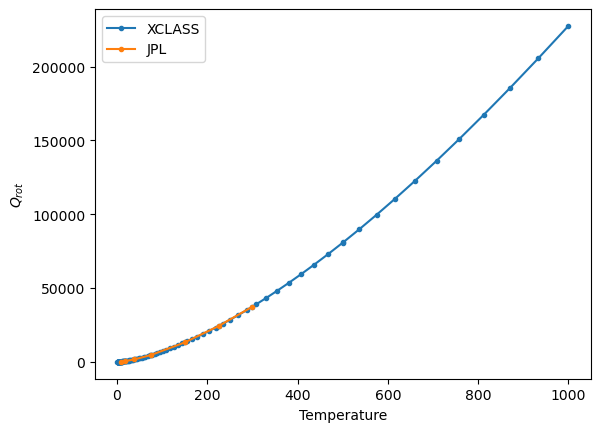

In [43]:
pl.plot(T, ContentsC2H5CN[0][5:115], '.-', label='XCLASS')
pl.plot(st.meta['Temperature (K)'], [10**st[st['NAME'] == 'C2H5CN'][x] for x in ["QLOG1","QLOG2","QLOG3","QLOG4","QLOG5","QLOG6","QLOG7"]], '.-', label='JPL')
pl.legend(loc='best')
#pl.gca().axis([0,400,0,18000])
pl.xlabel("Temperature")
pl.ylabel("$Q_{rot}$")